In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.shape

(891, 15)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['age'] = df['age'].fillna(df['age'].median())

In [ ]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
sns.set_theme(style="whitegrid")

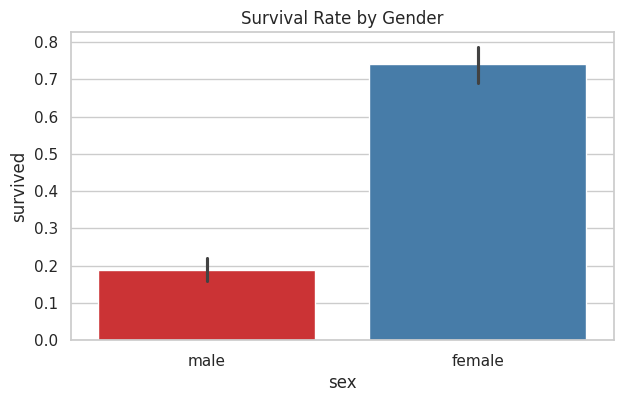

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='sex', y='survived', palette='Set1')
plt.title('Survival Rate by Gender')
plt.show()

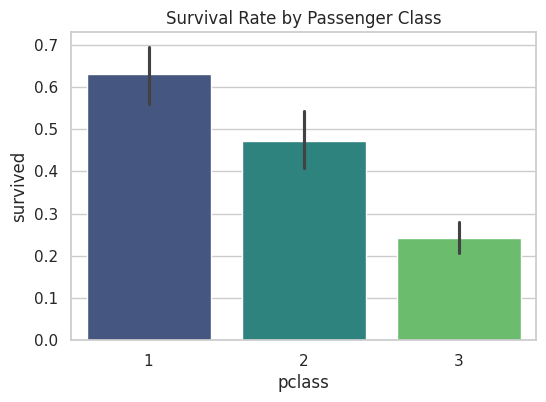

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='pclass', y='survived', palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.show()

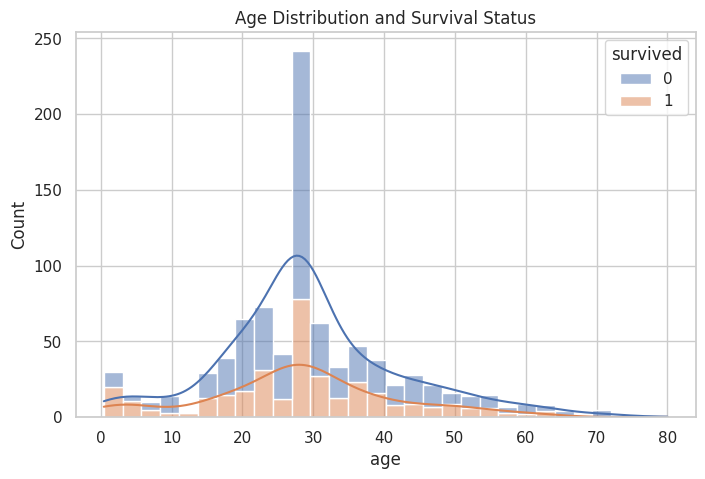

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='survived', kde=True, multiple='stack')
plt.title('Age Distribution and Survival Status')
plt.show()

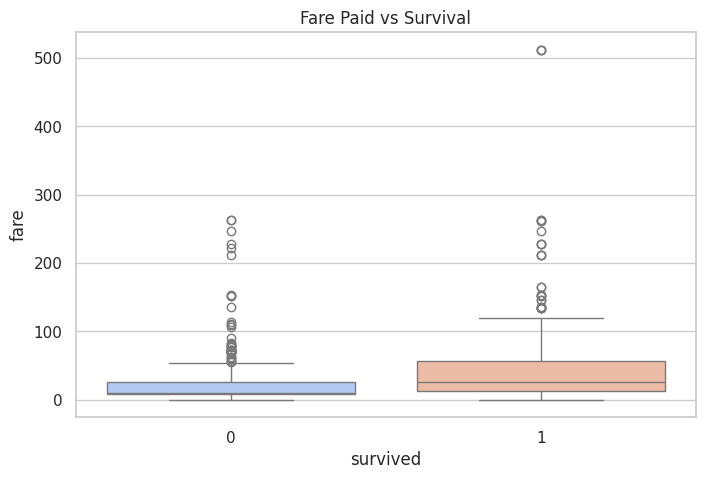

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='survived', y='fare', palette='coolwarm')
plt.title('Fare Paid vs Survival')
plt.show()

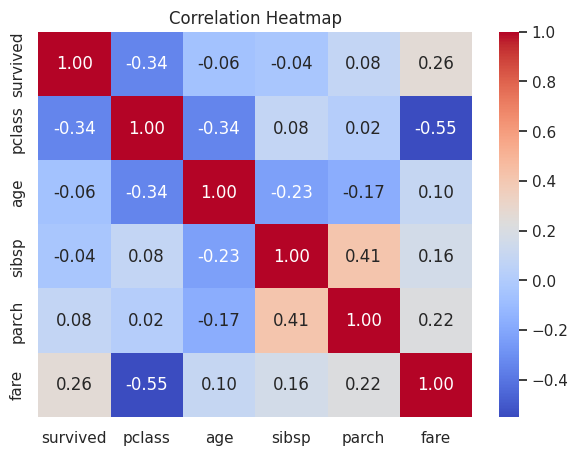

In [ ]:
if 'embarked' in df.columns:
    df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Now, run the correlation matrix
plt.figure(figsize=(7, 5))
correlation_matrix = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()